# **RYANAIR** - *AIRLINE* - **ANALYSIS**

####  *RYANAIR-AIRLINE*

*Rainer Airlines is a premium airline known for its exceptional service, luxurious amenities, and commitment to passenger comfort and safety. With a focus on delivering a top-tier travel experience, Rainer Airlines offers spacious seating, gourmet dining options, state-of-the-art entertainment systems, and personalized service from dedicated cabin crew members. Whether flying for business or leisure, passengers can expect a seamless journey with Rainer Airlines, characterized by elegance, efficiency, and attention to detail.*

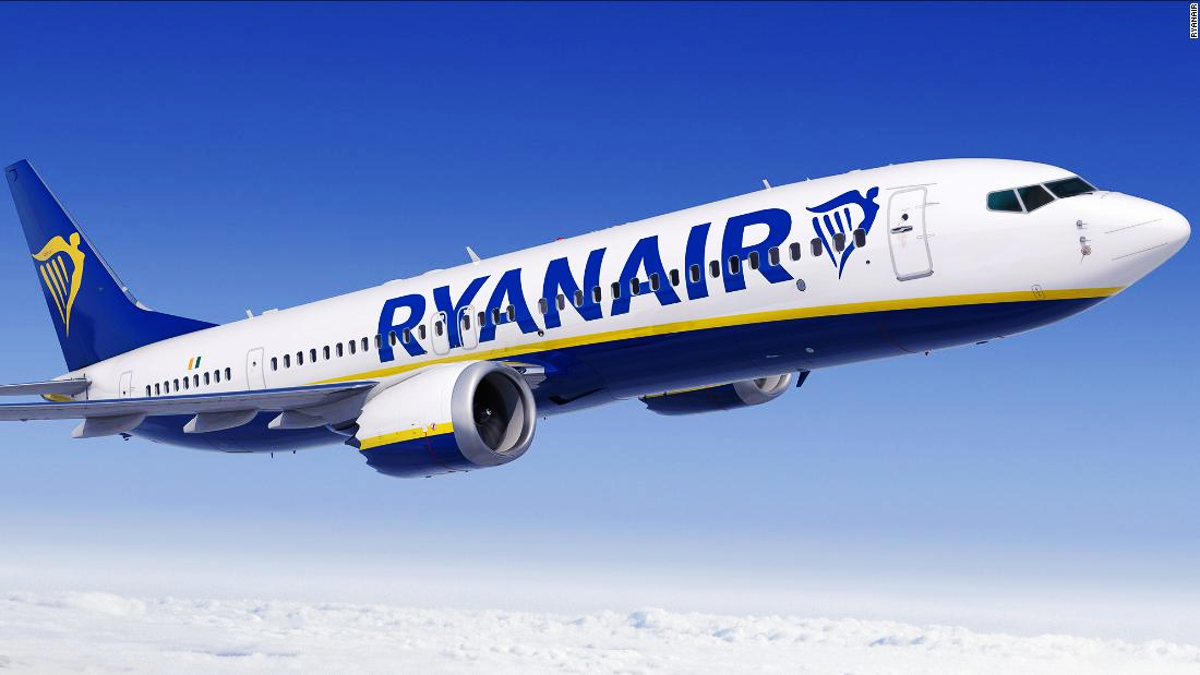

##### ****About Dataset****

****Welcome to this comprehensive dataset offering an in-depth exploration of the passenger experience with Ryanair, one of Europe's ' foremost low-cost airlines. This dataset compiles a diverse array of opinions and ratings provided directly by passengers themselves, covering various aspects of Ryanair flights from 2012 to 2024.****

*In this dataset, you'll find:*

***Passenger-reported ratings on seat comfort, cabin crew service, food & beverages, ground service, and overall value for money. Detailed insights into the types of travelers, such as leisure, business, or family. Information on aircraft types, seat types, routes flown, and dates of travel. A breakdown of passenger nationalities and trip verification status. From analyzing seat comfort to evaluating the overall value for money, this dataset provides a wealth of information to explore. Dive into the data to uncover trends, patterns, and valuable insights that can inform travelers, analysts, and aviation enthusiasts alike.***

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer

In [4]:
df=pd.read_csv("ryanair_reviews.csv")

In [5]:
df.head()

,Unnamed: 0,Date Published,Overall Rating,Passenger Country,Trip_verified,Comment title,Comment,Aircraft,Type Of Traveller,Seat Type,...,Destination,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Value For Money,Recommended,Inflight Entertainment,Wifi & Connectivity
0,0,2024-02-03,10.0,United Kingdom,Not Verified,"""bang on time and smooth flights""",Flew back from Faro to London Luton Friday 2nd...,Boeing 737 900,Family Leisure,Economy Class,...,Luton,February 2024,4.0,5.0,3.0,4.0,4.0,yes,NaN,NaN
1,1,2024-01-26,10.0,United Kingdom,Trip Verified,"""Another good affordable flight""",Another good affordable flight with Ryanair. O...,NaN,Couple Leisure,Economy Class,...,Alicante,January 2024,3.0,5.0,3.0,5.0,5.0,yes,NaN,NaN
2,2,2024-01-20,10.0,United Kingdom,Trip Verified,“Really impressed!”,"Really impressed! You get what you pay for, th...",Boeing 737-800,Couple Leisure,Economy Class,...,Paris Beauvais,October 2023,5.0,5.0,4.0,5.0,5.0,yes,NaN,NaN
3,3,2024-01-07,6.0,United Kingdom,Trip Verified,“a decent offering from Ryanair”,I should like to review my flight from Faro to...,Boeing 737,Solo Leisure,Economy Class,...,Liverpool,January 2024,3.0,2.0,1.0,3.0,3.0,yes,NaN,NaN
4,4,2024-01-06,10.0,Israel,Trip Verified,“cabin crew were welcoming and friendly”,"Flight left the gate ahead of schedule, fare w...",Boeing 737-800,Solo Leisure,Economy Class,...,Manchester,January 2024,4.0,5.0,NaN,4.0,5.0,yes,NaN,NaN


In [6]:
df.tail()

,Unnamed: 0,Date Published,Overall Rating,Passenger Country,Trip_verified,Comment title,Comment,Aircraft,Type Of Traveller,Seat Type,...,Destination,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Value For Money,Recommended,Inflight Entertainment,Wifi & Connectivity
2244,2244,2012-08-28,2.0,United Kingdom,NaN,Ryanair customer review,Myself and my daughter took a holiday to Kos. ...,NaN,NaN,Economy Class,...,NaN,NaN,1.0,1.0,1.0,NaN,1.0,no,NaN,NaN
2245,2245,2012-08-28,1.0,United Kingdom,NaN,Ryanair customer review,Stansted to Pula. Tried to adhere to all rules...,NaN,NaN,Economy Class,...,NaN,NaN,3.0,2.0,0.0,NaN,1.0,no,NaN,NaN
2246,2246,2012-08-28,1.0,United Kingdom,NaN,Ryanair customer review,When printing the boarding tickets we got our ...,NaN,NaN,Economy Class,...,NaN,NaN,1.0,1.0,1.0,NaN,1.0,no,NaN,NaN
2247,2247,2012-08-28,1.0,Australia,NaN,Ryanair customer review,Budapest - Manchester and back again with a 5 ...,NaN,NaN,Economy Class,...,NaN,NaN,1.0,1.0,1.0,NaN,2.0,no,NaN,NaN
2248,2248,2012-08-23,2.0,United Kingdom,NaN,Ryanair customer review,Stansted to Barcelona. Fine going there. Horre...,NaN,NaN,Economy Class,...,NaN,NaN,1.0,2.0,0.0,NaN,1.0,no,NaN,NaN


In [7]:
df.sample(4)

,Unnamed: 0,Date Published,Overall Rating,Passenger Country,Trip_verified,Comment title,Comment,Aircraft,Type Of Traveller,Seat Type,...,Destination,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Value For Money,Recommended,Inflight Entertainment,Wifi & Connectivity
577,577,2019-08-30,10.0,United Kingdom,Trip Verified,"""airline did a great job""",Stansted to Porto. I was worried about the str...,NaN,Family Leisure,Economy Class,...,Porto,August 2019,4.0,4.0,4.0,4.0,4.0,yes,2.0,2.0
2182,2182,2013-09-25,10.0,United Kingdom,NaN,Ryanair customer review,Ryanair is cheap so you gt what you pay for I ...,NaN,NaN,Economy Class,...,NaN,NaN,3.0,3.0,0.0,NaN,5.0,yes,NaN,NaN
329,329,2020-12-15,1.0,United Kingdom,Not Verified,"""I now have to contact my credit card company""",I booked return flights for two directly with ...,NaN,Couple Leisure,Economy Class,...,Riga,December 2020,NaN,NaN,NaN,NaN,1.0,no,NaN,NaN
351,351,2020-08-01,1.0,United Kingdom,Trip Verified,"""appalling customer service""",Was due to have a return flight with Ryanair f...,NaN,Couple Leisure,Economy Class,...,Stansted,April 2020,NaN,NaN,NaN,NaN,1.0,no,NaN,NaN


In [8]:
df.shape

(2249, 21)

In [9]:
df.columns

Index(['Unnamed: 0', 'Date Published', 'Overall Rating', 'Passenger Country',
       'Trip_verified', 'Comment title', 'Comment', 'Aircraft',
       'Type Of Traveller', 'Seat Type', 'Origin', 'Destination', 'Date Flown',
       'Seat Comfort', 'Cabin Staff Service', 'Food & Beverages',
       'Ground Service', 'Value For Money', 'Recommended',
       'Inflight Entertainment', 'Wifi & Connectivity'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2249 entries, 0 to 2248
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              2249 non-null   int64  
 1   Date Published          2249 non-null   object 
 2   Overall Rating          2119 non-null   float64
 3   Passenger Country       2249 non-null   object 
 4   Trip_verified           1305 non-null   object 
 5   Comment title           2249 non-null   object 
 6   Comment                 2249 non-null   object 
 7   Aircraft                551 non-null    object 
 8   Type Of Traveller       1635 non-null   object 
 9   Seat Type               2249 non-null   object 
 10  Origin                  1634 non-null   object 
 11  Destination             1634 non-null   object 
 12  Date Flown              1631 non-null   object 
 13  Seat Comfort            2137 non-null   float64
 14  Cabin Staff Service     2128 non-null   

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,2249.0,1124.000000,649.374699,0.0,562.0,1124.0,1686.0,2248.0
Overall Rating,2119.0,4.380368,3.554740,1.0,1.0,3.0,8.0,10.0
Seat Comfort,2137.0,2.373421,1.290634,0.0,1.0,2.0,3.0,5.0
Cabin Staff Service,2128.0,2.747180,1.535351,0.0,1.0,3.0,4.0,5.0
Food & Beverages,1312.0,1.921494,1.492650,0.0,1.0,1.0,3.0,5.0
Ground Service,1578.0,2.156527,1.491115,1.0,1.0,1.0,3.0,5.0
Value For Money,2248.0,2.731762,1.692578,0.0,1.0,2.0,5.0,5.0
Inflight Entertainment,331.0,1.157100,0.566303,1.0,1.0,1.0,1.0,5.0
Wifi & Connectivity,268.0,1.123134,0.536798,1.0,1.0,1.0,1.0,5.0


In [12]:
df.isna().sum()

Unnamed: 0                   0
Date Published               0
Overall Rating             130
Passenger Country            0
Trip_verified              944
Comment title                0
Comment                      0
Aircraft                  1698
Type Of Traveller          614
Seat Type                    0
Origin                     615
Destination                615
Date Flown                 618
Seat Comfort               112
Cabin Staff Service        121
Food & Beverages           937
Ground Service             671
Value For Money              1
Recommended                  0
Inflight Entertainment    1918
Wifi & Connectivity       1981
dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
df1=df[["Date Published","Overall Rating","Passenger Country","Comment title","Comment",
        "Type Of Traveller","Seat Type","Origin","Destination",
        "Cabin Staff Service",
       "Seat Comfort","Food & Beverages",
        "Ground Service","Value For Money","Recommended"]]

In [15]:
df1

,Date Published,Overall Rating,Passenger Country,Comment title,Comment,Type Of Traveller,Seat Type,Origin,Destination,Cabin Staff Service,Seat Comfort,Food & Beverages,Ground Service,Value For Money,Recommended
0,2024-02-03,10.0,United Kingdom,"""bang on time and smooth flights""",Flew back from Faro to London Luton Friday 2nd...,Family Leisure,Economy Class,Faro,Luton,5.0,4.0,3.0,4.0,4.0,yes
1,2024-01-26,10.0,United Kingdom,"""Another good affordable flight""",Another good affordable flight with Ryanair. O...,Couple Leisure,Economy Class,Belfast,Alicante,5.0,3.0,3.0,5.0,5.0,yes
2,2024-01-20,10.0,United Kingdom,“Really impressed!”,"Really impressed! You get what you pay for, th...",Couple Leisure,Economy Class,Edinburgh,Paris Beauvais,5.0,5.0,4.0,5.0,5.0,yes
3,2024-01-07,6.0,United Kingdom,“a decent offering from Ryanair”,I should like to review my flight from Faro to...,Solo Leisure,Economy Class,Faro,Liverpool,2.0,3.0,1.0,3.0,3.0,yes
4,2024-01-06,10.0,Israel,“cabin crew were welcoming and friendly”,"Flight left the gate ahead of schedule, fare w...",Solo Leisure,Economy Class,Dublin,Manchester,5.0,4.0,NaN,4.0,5.0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2244,2012-08-28,2.0,United Kingdom,Ryanair customer review,Myself and my daughter took a holiday to Kos. ...,NaN,Economy Class,NaN,NaN,1.0,1.0,1.0,NaN,1.0,no
2245,2012-08-28,1.0,United Kingdom,Ryanair customer review,Stansted to Pula. Tried to adhere to all rules...,NaN,Economy Class,NaN,NaN,2.0,3.0,0.0,NaN,1.0,no
2246,2012-08-28,1.0,United Kingdom,Ryanair customer review,When printing the boarding tickets we got our ...,NaN,Economy Class,NaN,NaN,1.0,1.0,1.0,NaN,1.0,no
2247,2012-08-28,1.0,Australia,Ryanair customer review,Budapest - Manchester and back again with a 5 ...,NaN,Economy Class,NaN,NaN,1.0,1.0,1.0,NaN,2.0,no


In [16]:
df1.isna().sum()

Date Published           0
Overall Rating         130
Passenger Country        0
Comment title            0
Comment                  0
Type Of Traveller      614
Seat Type                0
Origin                 615
Destination            615
Cabin Staff Service    121
Seat Comfort           112
Food & Beverages       937
Ground Service         671
Value For Money          1
Recommended              0
dtype: int64

####  #.1 Overall Rating

C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


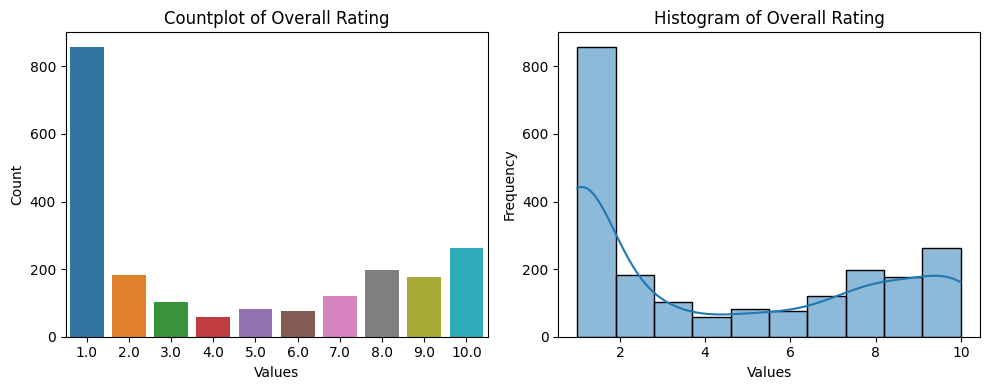

In [17]:
fig,axes=plt.subplots(1,2,figsize=(10,4))
axes=axes.flatten()

sns.countplot(x="Overall Rating",data=df1,ax=axes[0])
axes[0].set_title("Countplot of Overall Rating")
axes[0].set_xlabel("Values")
axes[0].set_ylabel("Count")

sns.histplot(df1["Overall Rating"],ax=axes[1],kde=True,bins=10)
axes[1].set_title("Histogram of Overall Rating")
axes[1].set_xlabel("Values")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

In [18]:
x1=df1["Overall Rating"].mode()[0]
df1["Overall Rating"].fillna(x1,inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7300\534212003.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Overall Rating"].fillna(x1,inplace=True)


#### #.2 Type Of Traveller

<Axes: xlabel='Type Of Traveller', ylabel='count'>

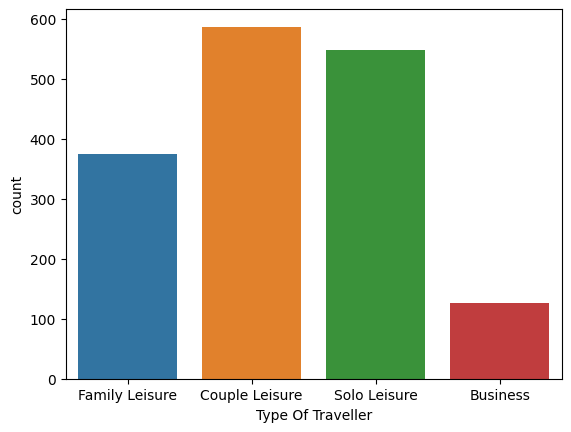

In [19]:
sns.countplot(df1,x="Type Of Traveller")

In [20]:
x1=df1["Type Of Traveller"].mode()[0]
df1["Type Of Traveller"].fillna(x1,inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7300\1546353383.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Type Of Traveller"].fillna(x1,inplace=True)


#### #3.Origin & Destination

<Axes: xlabel='Origin', ylabel='count'>

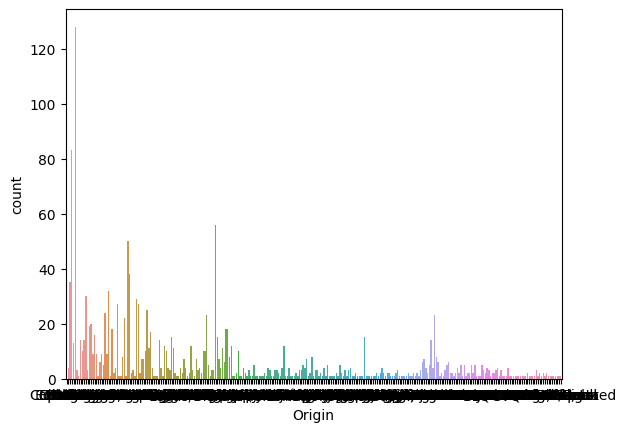

In [21]:
sns.countplot(df1,x="Origin")

<Axes: xlabel='Destination', ylabel='count'>

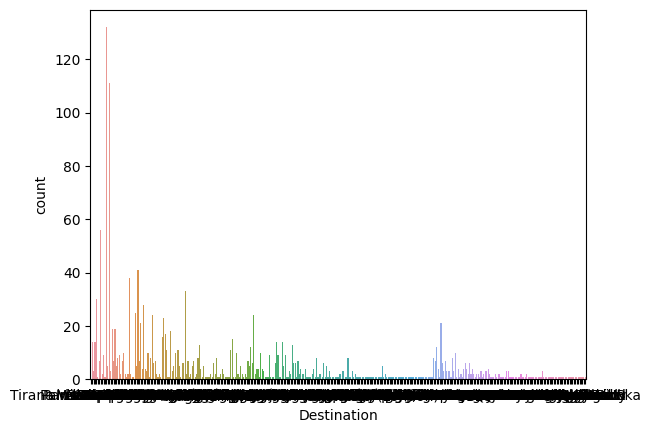

In [22]:
sns.countplot(df1,x="Destination")

In [23]:
df1.isna().sum()

Date Published           0
Overall Rating           0
Passenger Country        0
Comment title            0
Comment                  0
Type Of Traveller        0
Seat Type                0
Origin                 615
Destination            615
Cabin Staff Service    121
Seat Comfort           112
Food & Beverages       937
Ground Service         671
Value For Money          1
Recommended              0
dtype: int64

####  #4.Cabin Staff Service,Seat Comfort,Food &  Beverages,Ground Service

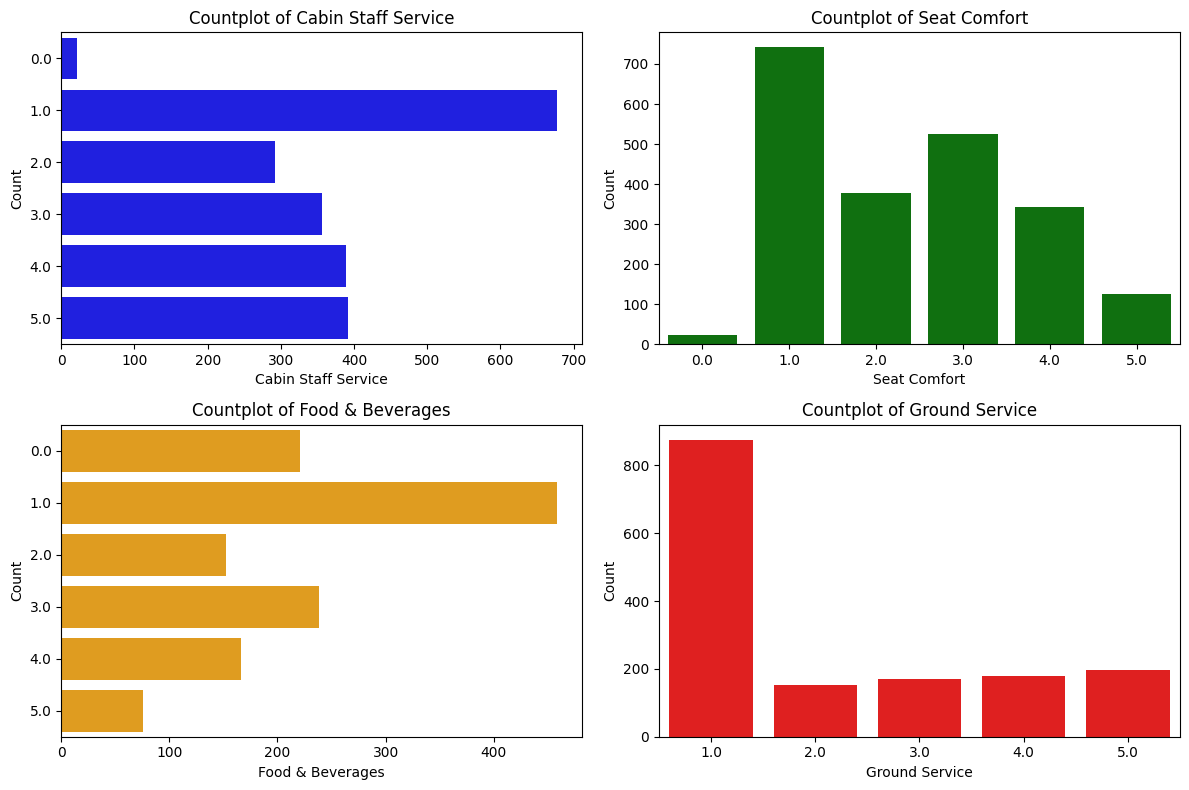

In [24]:
fig,axes=plt.subplots(2,2,figsize=(12,8))

axes=axes.flatten()



columns=["Cabin Staff Service","Seat Comfort",
           "Food & Beverages","Ground Service"]

colors=["blue","green","orange","red"]

for i ,(col,color) in enumerate(zip(columns,colors)):
    if i % 2==0:
          sns.countplot(y=col,data=df,ax=axes[i],color=color)
          axes[i].set_title(f"Countplot of {col}")
          axes[i].set_xlabel(col)
          axes[i].set_ylabel("Count")
          

        
    
    else:
        sns.countplot(x=col,data=df,ax=axes[i],color=color)
        axes[i].set_title(f"Countplot of {col}")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Count")
    
   
plt.tight_layout()
plt.show()



In [25]:
a1=df1["Cabin Staff Service"].mode()[0]
df1["Cabin Staff Service"].fillna(a1,inplace=True)

a2=df1["Seat Comfort"].mode()[0]
df1["Seat Comfort"].fillna(a2,inplace=True)

a3=df1["Food & Beverages"].mode()[0]
df1["Food & Beverages"].fillna(a3,inplace=True)

a4=df1["Ground Service"].mode()[0]
df1["Ground Service"].fillna(a4,inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7300\2316984233.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Cabin Staff Service"].fillna(a1,inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7300\2316984233.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Seat Comfort"].fillna(a2,inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7300\2316984233.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["

In [26]:
df1.isna().sum()

Date Published           0
Overall Rating           0
Passenger Country        0
Comment title            0
Comment                  0
Type Of Traveller        0
Seat Type                0
Origin                 615
Destination            615
Cabin Staff Service      0
Seat Comfort             0
Food & Beverages         0
Ground Service           0
Value For Money          1
Recommended              0
dtype: int64

In [27]:
df1=df1.dropna()

In [28]:
### # 

<Axes: xlabel='Passenger Country', ylabel='count'>

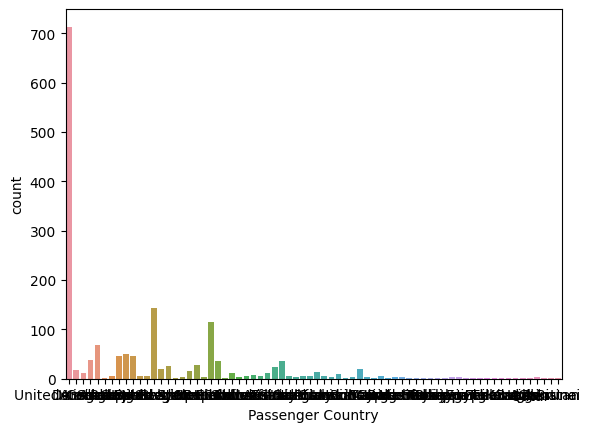

In [29]:
sns.countplot(df1,x="Passenger Country")

# ANALYSIS

#### A.  Overall Rating

C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


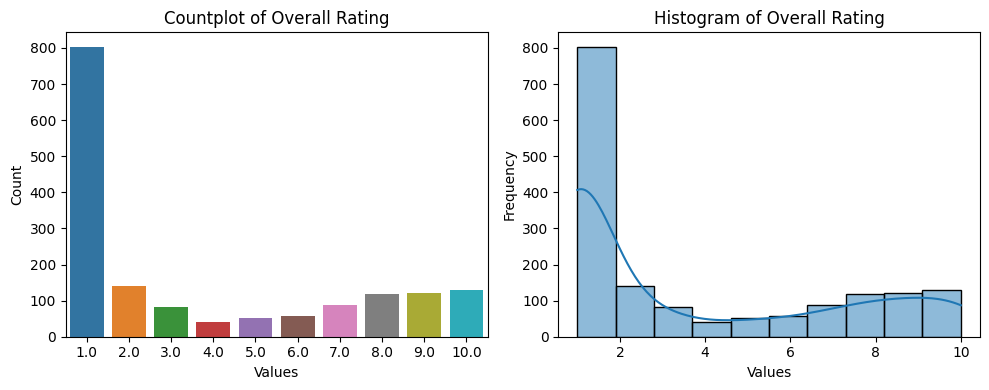

In [30]:
fig,axes=plt.subplots(1,2,figsize=(10,4))
axes=axes.flatten()

sns.countplot(x="Overall Rating",data=df1,ax=axes[0])
axes[0].set_title("Countplot of Overall Rating")
axes[0].set_xlabel("Values")
axes[0].set_ylabel("Count")

sns.histplot(df1["Overall Rating"],ax=axes[1],kde=True,bins=10)
axes[1].set_title("Histogram of Overall Rating")
axes[1].set_xlabel("Values")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

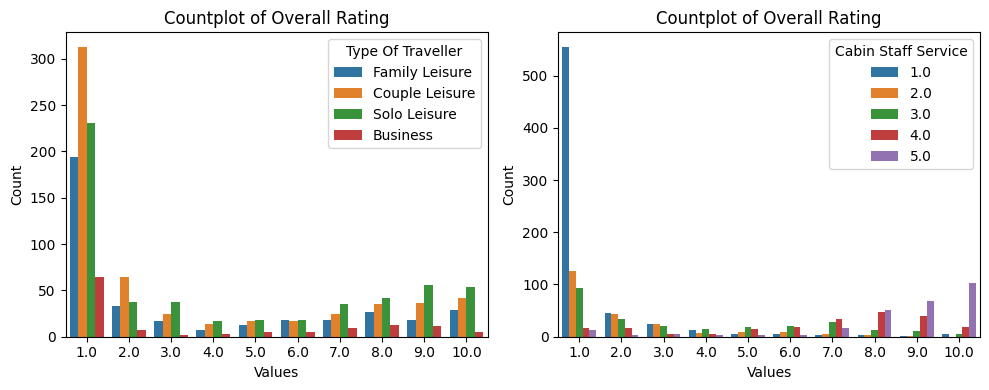

In [31]:
fig,axes=plt.subplots(1,2,figsize=(10,4))
axes=axes.flatten()

sns.countplot(x="Overall Rating",data=df1,ax=axes[0],hue="Type Of Traveller")
axes[0].set_title("Countplot of Overall Rating")
axes[0].set_xlabel("Values")
axes[0].set_ylabel("Count")

sns.countplot(x="Overall Rating",data=df1,ax=axes[1],hue="Cabin Staff Service")
axes[1].set_title("Countplot of Overall Rating")
axes[1].set_xlabel("Values")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

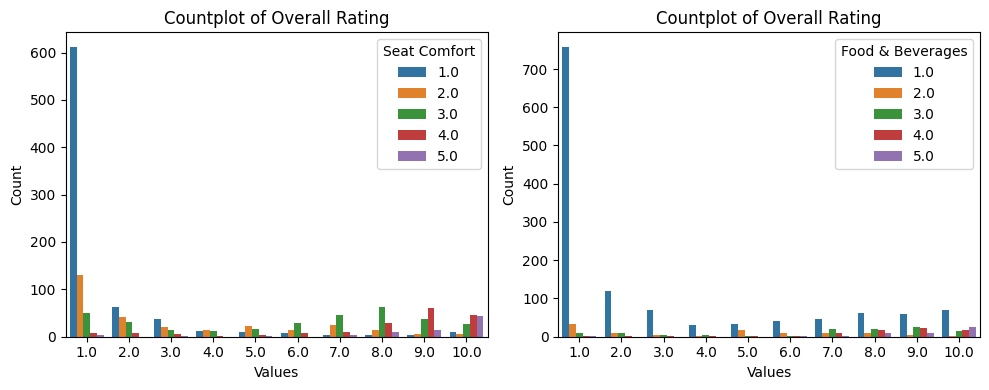

In [32]:
fig,axes=plt.subplots(1,2,figsize=(10,4))
axes=axes.flatten()

sns.countplot(x="Overall Rating",data=df1,ax=axes[0],hue="Seat Comfort")
axes[0].set_title("Countplot of Overall Rating")
axes[0].set_xlabel("Values")
axes[0].set_ylabel("Count")

sns.countplot(x="Overall Rating",data=df1,ax=axes[1],hue="Food & Beverages")
axes[1].set_title("Countplot of Overall Rating")
axes[1].set_xlabel("Values")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

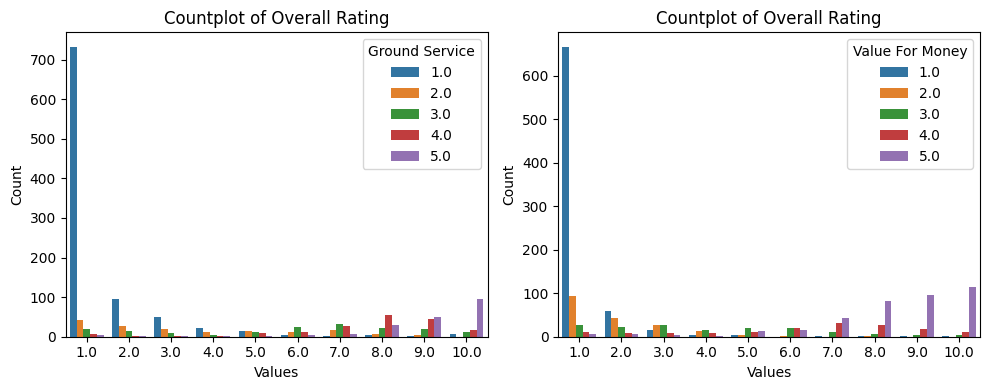

In [33]:
fig,axes=plt.subplots(1,2,figsize=(10,4))
axes=axes.flatten()

sns.countplot(x="Overall Rating",data=df1,ax=axes[0],hue="Ground Service")
axes[0].set_title("Countplot of Overall Rating")
axes[0].set_xlabel("Values")
axes[0].set_ylabel("Count")

sns.countplot(x="Overall Rating",data=df1,ax=axes[1],hue="Value For Money")
axes[1].set_title("Countplot of Overall Rating")
axes[1].set_xlabel("Values")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

<Axes: xlabel='Overall Rating', ylabel='count'>

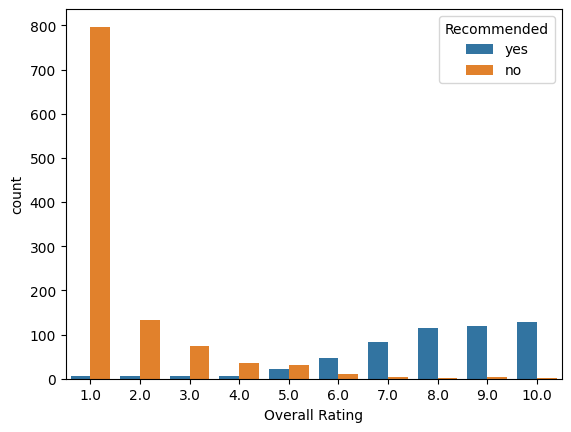

In [34]:
sns.countplot(df1,x="Overall Rating",hue="Recommended")

####  B. Passenger Country	

In [35]:
df1["Passenger Country"].nunique()

70

In [36]:
df1["Passenger Country"].unique()

array(['United Kingdom', 'Israel', 'Denmark', 'Australia', 'Germany',
       'Albania', 'Singapore', 'Portugal', 'Canada', 'Spain', 'Belarus',
       'Norway', 'United States', 'Sweden', 'Belgium', 'Iraq',
       'United Arab Emirates', 'Czech Republic', 'Greece', 'Morocco',
       'Ireland', 'Netherlands', 'Gibraltar', 'India', 'Slovenia',
       'South Africa', 'Switzerland', 'New Zealand', 'Austria', 'France',
       'Italy', 'Slovakia', 'Croatia', 'Hungary', 'Lithuania', 'Poland',
       'Finland', 'Latvia', 'Ukraine', 'Luxembourg', 'Indonesia',
       'Romania', 'Malta', 'Estonia', 'Cyprus', 'Macedonia', 'Bulgaria',
       'Mexico', 'Vietnam', 'Lebanon', 'Serbia', 'Turkey', 'Malaysia',
       'Jordan', 'Philippines', 'Japan', 'Egypt', 'Russian Federation',
       'Chile', 'Hong Kong', 'Iceland', 'Thailand', 'Kuwait', 'Brazil',
       'Laos', 'Qatar', 'China', 'Argentina', 'Pakistan', 'Brunei'],
      dtype=object)

In [37]:
df1.groupby("Passenger Country")["Overall Rating"].count()

Passenger Country
Albania                   2
Argentina                 1
Australia                38
Austria                  12
Belarus                   5
                       ... 
Ukraine                   9
United Arab Emirates      3
United Kingdom          713
United States           143
Vietnam                   1
Name: Overall Rating, Length: 70, dtype: int64

In [38]:
df1.groupby("Passenger Country")["Passenger Country"].max()

Passenger Country
Albania                              Albania
Argentina                          Argentina
Australia                          Australia
Austria                              Austria
Belarus                              Belarus
                                ...         
Ukraine                              Ukraine
United Arab Emirates    United Arab Emirates
United Kingdom                United Kingdom
United States                  United States
Vietnam                              Vietnam
Name: Passenger Country, Length: 70, dtype: object

In [39]:
df1.groupby("Passenger Country")["Passenger Country"].min()

Passenger Country
Albania                              Albania
Argentina                          Argentina
Australia                          Australia
Austria                              Austria
Belarus                              Belarus
                                ...         
Ukraine                              Ukraine
United Arab Emirates    United Arab Emirates
United Kingdom                United Kingdom
United States                  United States
Vietnam                              Vietnam
Name: Passenger Country, Length: 70, dtype: object

<Axes: xlabel='Recommended', ylabel='count'>

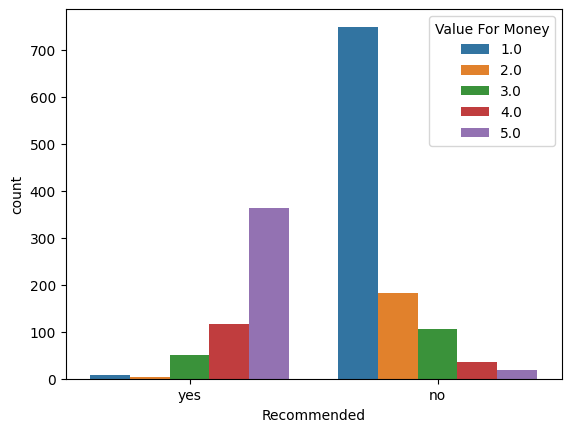

In [40]:
sns.countplot(df1,x="Recommended",hue="Value For Money")

In [41]:
df1.isna().sum()

Date Published         0
Overall Rating         0
Passenger Country      0
Comment title          0
Comment                0
Type Of Traveller      0
Seat Type              0
Origin                 0
Destination            0
Cabin Staff Service    0
Seat Comfort           0
Food & Beverages       0
Ground Service         0
Value For Money        0
Recommended            0
dtype: int64

In [42]:
df2=df1[["Overall Rating","Type Of Traveller","Comment","Origin","Destination","Cabin Staff Service",
         "Food & Beverages","Ground Service","Recommended"]]

In [43]:
df2

,Overall Rating,Type Of Traveller,Comment,Origin,Destination,Cabin Staff Service,Food & Beverages,Ground Service,Recommended
0,10.0,Family Leisure,Flew back from Faro to London Luton Friday 2nd...,Faro,Luton,5.0,3.0,4.0,yes
1,10.0,Couple Leisure,Another good affordable flight with Ryanair. O...,Belfast,Alicante,5.0,3.0,5.0,yes
2,10.0,Couple Leisure,"Really impressed! You get what you pay for, th...",Edinburgh,Paris Beauvais,5.0,4.0,5.0,yes
3,6.0,Solo Leisure,I should like to review my flight from Faro to...,Faro,Liverpool,2.0,1.0,3.0,yes
4,10.0,Solo Leisure,"Flight left the gate ahead of schedule, fare w...",Dublin,Manchester,5.0,1.0,4.0,yes
...,...,...,...,...,...,...,...,...,...
1630,1.0,Solo Leisure,Glasgow to Bydgoszcz on Friday 5th June. Well ...,Glasgow,Bydgoszcz,2.0,1.0,1.0,no
1631,2.0,Solo Leisure,Flew from Warsaw Modlin to London Stansted. Go...,Warsaw Modlin,London Stansted,1.0,1.0,1.0,no
1632,4.0,Solo Leisure,Went STN-DUB-STN with both flights not having ...,STN,DUB,3.0,1.0,1.0,no
1633,6.0,Solo Leisure,"Went STN-CHP-STN, with no real incidents on ei...",STN,CHP,4.0,1.0,1.0,no


# SEGMENT ANALYSIS :Type Of Traveller	

In [44]:
def segment_travel_type(row):
    if "Family Leisure" in row["Type Of Traveller"]:
        return "Family Leisure"
    elif "Couple Leisure" in row["Type Of Traveller"]:
        return "Couple Leisure"
    elif "Solo Leisure" in row["Type Of Traveller"]:
        return "Solo Leisure"
    else:
        return "Business"


In [45]:
df2["traveler_segment"]=df2.apply(segment_travel_type,axis=1)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7300\2917255406.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["traveler_segment"]=df2.apply(segment_travel_type,axis=1)


In [46]:
df2

,Overall Rating,Type Of Traveller,Comment,Origin,Destination,Cabin Staff Service,Food & Beverages,Ground Service,Recommended,traveler_segment
0,10.0,Family Leisure,Flew back from Faro to London Luton Friday 2nd...,Faro,Luton,5.0,3.0,4.0,yes,Family Leisure
1,10.0,Couple Leisure,Another good affordable flight with Ryanair. O...,Belfast,Alicante,5.0,3.0,5.0,yes,Couple Leisure
2,10.0,Couple Leisure,"Really impressed! You get what you pay for, th...",Edinburgh,Paris Beauvais,5.0,4.0,5.0,yes,Couple Leisure
3,6.0,Solo Leisure,I should like to review my flight from Faro to...,Faro,Liverpool,2.0,1.0,3.0,yes,Solo Leisure
4,10.0,Solo Leisure,"Flight left the gate ahead of schedule, fare w...",Dublin,Manchester,5.0,1.0,4.0,yes,Solo Leisure
...,...,...,...,...,...,...,...,...,...,...
1630,1.0,Solo Leisure,Glasgow to Bydgoszcz on Friday 5th June. Well ...,Glasgow,Bydgoszcz,2.0,1.0,1.0,no,Solo Leisure
1631,2.0,Solo Leisure,Flew from Warsaw Modlin to London Stansted. Go...,Warsaw Modlin,London Stansted,1.0,1.0,1.0,no,Solo Leisure
1632,4.0,Solo Leisure,Went STN-DUB-STN with both flights not having ...,STN,DUB,3.0,1.0,1.0,no,Solo Leisure
1633,6.0,Solo Leisure,"Went STN-CHP-STN, with no real incidents on ei...",STN,CHP,4.0,1.0,1.0,no,Solo Leisure


<Axes: xlabel='Type Of Traveller', ylabel='count'>

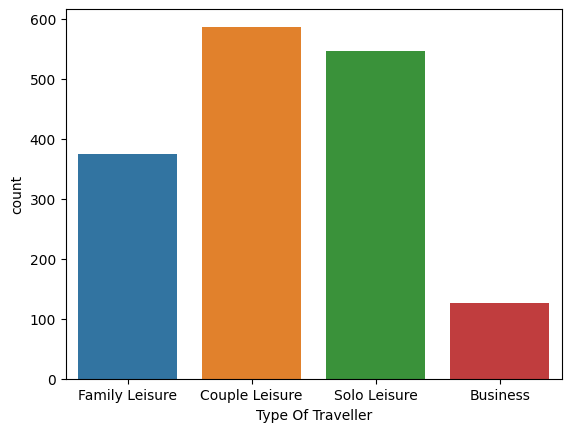

In [47]:
sns.countplot(df1,x="Type Of Traveller")

In [48]:
from sklearn.preprocessing import LabelEncoder
df2["Recommended"]=LabelEncoder().fit_transform(df2["Recommended"])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7300\2052120844.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Recommended"]=LabelEncoder().fit_transform(df2["Recommended"])


In [49]:
df2

,Overall Rating,Type Of Traveller,Comment,Origin,Destination,Cabin Staff Service,Food & Beverages,Ground Service,Recommended,traveler_segment
0,10.0,Family Leisure,Flew back from Faro to London Luton Friday 2nd...,Faro,Luton,5.0,3.0,4.0,1,Family Leisure
1,10.0,Couple Leisure,Another good affordable flight with Ryanair. O...,Belfast,Alicante,5.0,3.0,5.0,1,Couple Leisure
2,10.0,Couple Leisure,"Really impressed! You get what you pay for, th...",Edinburgh,Paris Beauvais,5.0,4.0,5.0,1,Couple Leisure
3,6.0,Solo Leisure,I should like to review my flight from Faro to...,Faro,Liverpool,2.0,1.0,3.0,1,Solo Leisure
4,10.0,Solo Leisure,"Flight left the gate ahead of schedule, fare w...",Dublin,Manchester,5.0,1.0,4.0,1,Solo Leisure
...,...,...,...,...,...,...,...,...,...,...
1630,1.0,Solo Leisure,Glasgow to Bydgoszcz on Friday 5th June. Well ...,Glasgow,Bydgoszcz,2.0,1.0,1.0,0,Solo Leisure
1631,2.0,Solo Leisure,Flew from Warsaw Modlin to London Stansted. Go...,Warsaw Modlin,London Stansted,1.0,1.0,1.0,0,Solo Leisure
1632,4.0,Solo Leisure,Went STN-DUB-STN with both flights not having ...,STN,DUB,3.0,1.0,1.0,0,Solo Leisure
1633,6.0,Solo Leisure,"Went STN-CHP-STN, with no real incidents on ei...",STN,CHP,4.0,1.0,1.0,0,Solo Leisure


In [50]:
segment_analysis=df2.groupby("traveler_segment").agg({
    "Overall Rating":"mean",
    "Cabin Staff Service":"mean",
    "Food & Beverages":"mean",
    "Ground Service":"mean",
    "Recommended":lambda x: (x.sum()/ len(x))*100
    
}).reset_index()

segment_analysis.columns=["Traveler Segment","Average Overall Ratings","Average Cabin Staff","Average Food and Beverage Rate",
                          "Average Ground Service Rate","Recomendation Rate (%)"]

In [51]:
segment_analysis

,Traveler Segment,Average Overall Ratings,Average Cabin Staff,Average Food and Beverage Rate,Average Ground Service Rate,Recomendation Rate (%)
0,Business,3.785714,2.452381,1.428571,2.150794,38.095238
1,Couple Leisure,3.330494,2.376491,1.410562,1.933560,27.257240
2,Family Leisure,3.491979,2.475936,1.510695,2.061497,31.283422
3,Solo Leisure,4.230769,2.683150,1.500000,2.346154,39.926740


#### Orgin-Destination-Analysis

A. To analyze ratings based on the origin and destination of travelers and
identify popular routes and destinations with the highest ratings

In [52]:
ratings_by_route = df2.groupby(['Origin', 'Destination']).agg({
    'Overall Rating': 'mean',
    'Cabin Staff Service': 'mean',
    'Food & Beverages': 'mean',
    'Ground Service': 'mean'
}).reset_index()
highest_rated_routes = ratings_by_route.sort_values(by='Overall Rating', ascending=False).head(10)
print("Top 10 Routes with the Highest Ratings:")
highest_rated_routes

Top 10 Routes with the Highest Ratings:


,Origin,Destination,Overall Rating,Cabin Staff Service,Food & Beverages,Ground Service
338,DUB,MAN,10.0,5.0,5.0,3.0
884,PDL,LIS,10.0,4.0,1.0,4.0
345,Dortmund,Stansted,10.0,5.0,1.0,5.0
782,Malaga,Nis via Weeze,10.0,4.0,4.0,4.0
344,Dortmund,London Stansted,10.0,5.0,1.0,5.0
204,Bratislava,Bologna,10.0,1.0,1.0,1.0
827,Manchester,Shannon,10.0,5.0,1.0,4.0
90,BTS,SXF,10.0,4.0,1.0,5.0
176,Birmingham,Fuertenventura,10.0,5.0,1.0,5.0
850,Milan Bergamo,Brindisi,10.0,5.0,1.0,5.0


B. To analyze ratings based on the origin and destination of travelers and
identify  routes and destinations with the lowest ratings

In [53]:
ratings_by_route = df2.groupby(['Origin', 'Destination']).agg({
    'Overall Rating': 'mean',
    'Cabin Staff Service': 'mean',
    'Food & Beverages': 'mean',
    'Ground Service': 'mean'
}).reset_index()
lowest_rated_routes = ratings_by_route.sort_values(by='Overall Rating', ascending=True).head(10)
print("Top 10 Routes with the Lowest Ratings:")
lowest_rated_routes

Top 10 Routes with the Lowest Ratings:


,Origin,Destination,Overall Rating,Cabin Staff Service,Food & Beverages,Ground Service
613,Leeds,Bratislava,1.0,1.0,1.0,1.0
551,Ibiza,Malaga,1.0,1.0,1.0,1.0
552,Ibiza,Milano Bergamo,1.0,1.0,1.0,1.0
558,Kerry,Luton,1.0,3.0,1.0,1.0
559,Kiev,Stansted,1.0,1.0,1.0,1.0
560,Kiev,Warsaw,1.0,1.0,1.0,1.0
561,Knock,Athens via Stansted,1.0,3.0,1.0,1.0
564,Knock,Luton,1.0,1.0,1.0,1.0
549,Ibiza,Liverpool,1.0,1.5,2.0,1.0
566,Knock,Toulouse via London Stansted,1.0,1.0,1.0,2.0


In [54]:

average_ratings = {
    'Cabin Staff Service': df2['Cabin Staff Service'].mean(),
    'Food & Beverage': df2['Food & Beverages'].mean(),
    'Ground Service': df2['Ground Service'].mean()
}
print("Average Ratings:")
for service, rating in average_ratings.items():
    print(f"{service}: {rating:.2f}")



Average Ratings:
Cabin Staff Service: 2.51
Food & Beverage: 1.46
Ground Service: 2.12


In [55]:
lower_ratings_feedback = df2[df2['Overall Rating'] < 5]['Comment']
print("\nFeedback for Lower Ratings:")
for feedback in lower_ratings_feedback:
    print(feedback)


Feedback for Lower Ratings:
Booked a fight from Copenhagen to Poland though booking.com Somewhere in the email from booking.com it states that checkin must be done online from home. I figure I'll do it in the morning since I have plenty of time. it's low season and I don't have any checked in luggage. I live in Copenhagen not far from the airport. Morning comes and I try to check in online. No luck, apparently they close online checkin 3 hours before the flight. I figure I'll just check in at the airport at those self serve terminals. I arrive at the airport 2 hours before my flight and head for a terminal. Prompt says: kindly go to service desk. Head for service desk. They charge me 42 euro to check me in. The flight itself was 57 euro. They almost charged me the price of the flight just to check me in manually! And they forced me to check in manually by closing online and self-serve checkin. This is Ryanair policy. Apparently. Wizzair and booking are not without blame either, as the

In [56]:
from textblob import TextBlob

feedback_data=df2[df2["Overall Rating"]<5]["Comment"]

sentiment_scores=[]

for feedback in feedback_data:
    blob=TextBlob(feedback)
    sentiment_scores.append(blob.sentiment.polarity)

average_sentiment=sum(sentiment_scores) / len(sentiment_scores)
print("Average Sentiment Score :",average_sentiment)


Average Sentiment Score : -0.04048582545840915


In [57]:



nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')  


feedback_data = df2[df2['Overall Rating'] < 6]['Comment']  


stop_words = set(stopwords.words('english'))
tokenized_feedback = [word_tokenize(feedback.lower()) for feedback in feedback_data]
filtered_feedback = [[word for word in feedback if word.isalnum() and word not in stop_words] for feedback in tokenized_feedback]


sid = SentimentIntensityAnalyzer()
sentiment_scores = [sid.polarity_scores(' '.join(feedback))['compound'] for feedback in filtered_feedback]


average_sentiment = sum(sentiment_scores) / len(sentiment_scores)
print("Average Sentiment Score:", average_sentiment)

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading vader_lexicon: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


Average Sentiment Score: -0.2503138516532619


In [58]:
df2

,Overall Rating,Type Of Traveller,Comment,Origin,Destination,Cabin Staff Service,Food & Beverages,Ground Service,Recommended,traveler_segment
0,10.0,Family Leisure,Flew back from Faro to London Luton Friday 2nd...,Faro,Luton,5.0,3.0,4.0,1,Family Leisure
1,10.0,Couple Leisure,Another good affordable flight with Ryanair. O...,Belfast,Alicante,5.0,3.0,5.0,1,Couple Leisure
2,10.0,Couple Leisure,"Really impressed! You get what you pay for, th...",Edinburgh,Paris Beauvais,5.0,4.0,5.0,1,Couple Leisure
3,6.0,Solo Leisure,I should like to review my flight from Faro to...,Faro,Liverpool,2.0,1.0,3.0,1,Solo Leisure
4,10.0,Solo Leisure,"Flight left the gate ahead of schedule, fare w...",Dublin,Manchester,5.0,1.0,4.0,1,Solo Leisure
...,...,...,...,...,...,...,...,...,...,...
1630,1.0,Solo Leisure,Glasgow to Bydgoszcz on Friday 5th June. Well ...,Glasgow,Bydgoszcz,2.0,1.0,1.0,0,Solo Leisure
1631,2.0,Solo Leisure,Flew from Warsaw Modlin to London Stansted. Go...,Warsaw Modlin,London Stansted,1.0,1.0,1.0,0,Solo Leisure
1632,4.0,Solo Leisure,Went STN-DUB-STN with both flights not having ...,STN,DUB,3.0,1.0,1.0,0,Solo Leisure
1633,6.0,Solo Leisure,"Went STN-CHP-STN, with no real incidents on ei...",STN,CHP,4.0,1.0,1.0,0,Solo Leisure


In [59]:

aspect_sentiment_results = {
    'Cabin Staff Service':average_sentiment,
    'Food Quality':average_sentiment,
    'Ground Services':average_sentiment
}


top_rated_routes = [
    {'Route': 'DUB       TO   MAN',  'Rating': 10},
    {'Route': 'PDS       TO   LIS',  'Rating': 10},
    {'Route': 'Dortmund	 TO   Stansted',  'Rating': 10},
    {'Route': 'Malaga	 TO   Nis via Weeze',  'Rating': 10},
    {'Route': 'Dortmund  TO 	 London Stansted',  'Rating': 10},


]


low_rated_routes = [
    {'Route': 'Leeds   TO	Bratislava',  'Rating': 1},
    {'Route': 'Ibiza   TO	Milano Bergamo',  'Rating': 1},
    {'Route': 'Ibiza   TO	Malaga',  'Rating': 1},
    {'Route': 'Kerry   TO	Luton',   'Rating': 1},
    {'Route': 'Kiev	 TO    Stansted',   'Rating': 1},


]


#  Findings and Insights
print("Key Findings and Insights:")
for aspect, score in aspect_sentiment_results.items():
    print(f"{aspect}: Average Sentiment Score - {score}")



print("*%"*100)


print("\nTop-Rated Routes:")
for route in top_rated_routes:
    print(f"{route['Route']}: Rating - {route['Rating']}")


print("*H"*100)

print("\nLow-Rated Routes:")
for route in low_rated_routes:
    print(f"{route['Route']}: Rating - {route['Rating']}")



print("*7"*100)


# Actionable Recommendations
print("\nActionable Recommendations:")
print("Cabin Staff Service:")
print("- Continue training programs for cabin crew.")
print("- Implement real-time feedback mechanisms.")


print("*"*100)

print("\nFood Quality:")
print("- Conduct a thorough review of food offerings.")
print("- Collaborate with suppliers for fresh ingredients.")


print("*"*100)


print("\nGround Services:")
print("- Invest in staff training and customer service programs.")
print("- Streamline processes to reduce waiting times.")


print("*"*100)


print("\nOverall Recommendations:")
print("- Monitor and analyze customer feedback regularly.")
print("- Foster a culture of customer-centricity.")
print("- Review and update service standards based on feedback.")

Key Findings and Insights:
Cabin Staff Service: Average Sentiment Score - -0.2503138516532619
Food Quality: Average Sentiment Score - -0.2503138516532619
Ground Services: Average Sentiment Score - -0.2503138516532619
*%*%*%*%*%*%*%*%*%*%*%*%*%*%*%*%*%*%*%*%*%*%*%*%*%*%*%*%*%*%*%*%*%*%*%*%*%*%*%*%*%*%*%*%*%*%*%*%*%*%*%*%*%*%*%*%*%*%*%*%*%*%*%*%*%*%*%*%*%*%*%*%*%*%*%*%*%*%*%*%*%*%*%*%*%*%*%*%*%*%*%*%*%*%*%*%*%*%*%*%

Top-Rated Routes:
DUB       TO   MAN: Rating - 10
PDS       TO   LIS: Rating - 10
Dortmund	 TO   Stansted: Rating - 10
Malaga	 TO   Nis via Weeze: Rating - 10
Dortmund  TO 	 London Stansted: Rating - 10
*H*H*H*H*H*H*H*H*H*H*H*H*H*H*H*H*H*H*H*H*H*H*H*H*H*H*H*H*H*H*H*H*H*H*H*H*H*H*H*H*H*H*H*H*H*H*H*H*H*H*H*H*H*H*H*H*H*H*H*H*H*H*H*H*H*H*H*H*H*H*H*H*H*H*H*H*H*H*H*H*H*H*H*H*H*H*H*H*H*H*H*H*H*H*H*H*H*H*H*H

Low-Rated Routes:
Leeds   TO	Bratislava: Rating - 1
Ibiza   TO	Milano Bergamo: Rating - 1
Ibiza   TO	Malaga: Rating - 1
Kerry   TO	Luton: Rating - 1
Kiev	 TO    Stansted: Ratin